<a href="https://colab.research.google.com/github/niranjanamani/Data-Science/blob/main/student_depression(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load dataset
df = pd.read_csv('/content/student_depression_dataset.csv')

In [4]:
# Drop unnecessary column
df = df.drop(columns=['id'])

In [5]:
# Separate features and target
X = df.drop(columns=['Depression'])
y = df['Depression']

In [6]:
# Define categorical and numerical columns
categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
                       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
                       'Family History of Mental Illness']

numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                     'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


In [7]:
# Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

In [8]:
# Create pipeline with Random Forest
model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [11]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8279878158036195

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



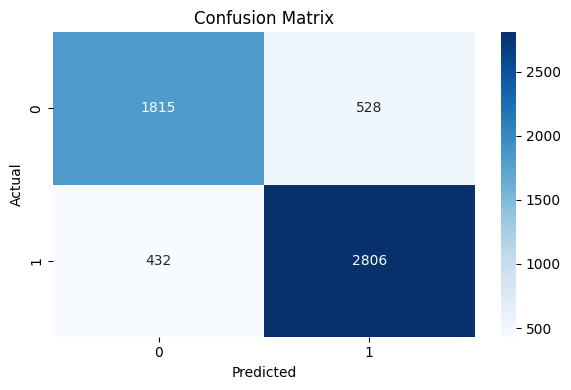

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [13]:
# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.84106791 0.84301075 0.84050179 0.84014337 0.84032258]
Average CV accuracy: 0.8410092807201084


In [14]:
# Save the model
joblib.dump(model, 'random_forest_model.pkl')
print("\nModel saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'
